In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import LSODA, solve_ivp
from numpy.linalg import solve, inv
import numba
import sys


sys.path.append('../Numerical_methods')
from matrix_calculator import A_matrix
from scheme_calculator import forward_backward
from bachelor_funcs import analytic_green, get_first_dev, r_array
from ODE_schemes import A_matrix_regular

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

In [85]:
x_i = 0.01
x_f = 2.1
x = np.linspace(x_i, x_f, N)
Δx = x[1] - x[0]
Δt = 0.004

N = len(x)
A = A_matrix_regular(N + 2, 3, 1) / Δx
A[0] = 0
A[0, 0] = 1
A[-1] = 0
A[-1, -1] = 1

In [86]:
def new_bound_ghost(t, Σ):
    inner = Σ * x**(1/2)
    ghost_1 = np.array([inner[1]])
    ghost_2 = np.array([inner[-2]])

    inner_ghost = np.concatenate((ghost_1, inner, ghost_2))
    x_ghost = np.concatenate((np.array([x[0] - Δx]), x, np.array([x[-1] + Δx])))

    outer_ghost = x_ghost**(1/2) * (A @ inner_ghost) 
    sec_dev = 3 / x_ghost * (A @ outer_ghost)

    return sec_dev[1: -1]

In [87]:
times = np.arange(0.008, 0.256 + Δt, Δt) / 12

Σ_initial = analytic_green(x, 0.006)
sol = solve_ivp(new_bound_ghost, [times[0], times[-1]], y0 = Σ_initial, t_eval = times, method = 'LSODA')

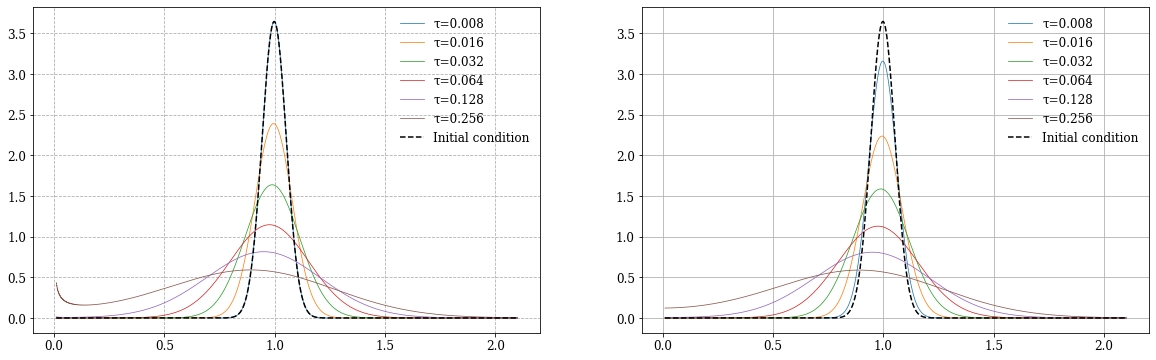

In [88]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
axs[0].grid(ls = '--')


plot_times = [0.008, 0.016, 0.032, 0.064, 0.128, 0.256]
for τ in plot_times:
    axs[0].plot(x, np.pi* sol.y[:, (sol.t*12) == τ], label=f'τ={τ}', lw=0.75)
axs[0].plot(x, np.pi * Σ_initial, label='Initial condition', c='black', ls='--')
axs[0].legend(frameon = False)


for τ in plot_times:
    axs[1].plot(x, np.pi * analytic_green(x, τ), label=f'τ={τ}', lw=0.75)
axs[1].grid('--')

axs[1].plot(x, np.pi* Σ_initial, label='Initial condition', c='black', ls='--')
axs[1].legend(frameon = False)

In [89]:
N = 2001
A = A_matrix_regular(N, 3, 1)
A[0] = 0
A[0, 0] = 1
A[-1] = 0
A[-1, -1] = 1

In [90]:
x_i = 0.01
x_f = 2.1
x = np.linspace(x_i, x_f, N)
Δx = x[1] - x[0]
Δt = 0.004

def green_bound(t, Σ):
    first_dev = Σ * x**(1/2)
    first_dev[0] = x[0]**(-1/2) * Σ[0]
    first_dev[-1] = x[-1]**(-1/2) * Σ[-1]

    inner = x**(1/2) * ((A @ first_dev) / Δx)
  

    sec_dev = inner.copy()
    sec_dev[0] = 3/2 * x[0]**(-1) * Σ[0] 
    sec_dev[-1] = 3/2 * x[-1]**(-1) * Σ[-1] 
    
    outer = (A @ sec_dev) / Δx

    return 3 * outer / x

In [91]:

times = np.arange(0.008, 0.256 + Δt, Δt)


sol = solve_ivp(green_bound, [times[0], times[-1]], y0 = Σ_initial, t_eval = times, method = 'LSODA')
sol

KeyboardInterrupt: 

In [ ]:
np.shape(sol.y)

(2001, 63)

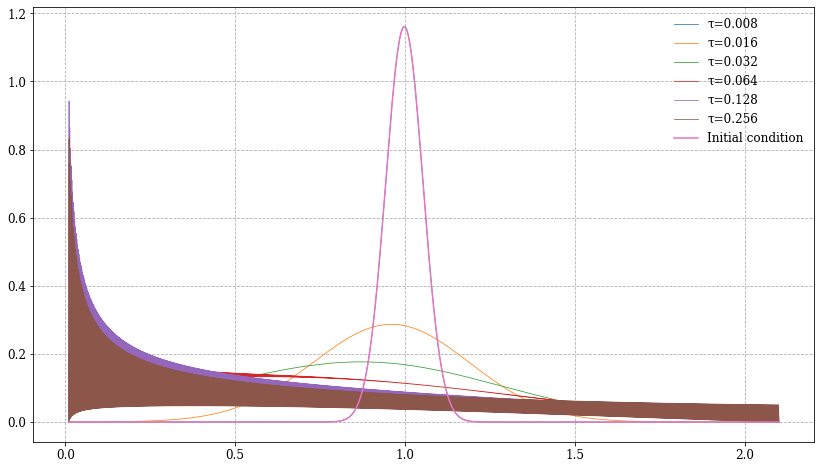

In [ ]:
fig, axs = plt.subplots(figsize=(14,8))
axs.grid(ls = '--')


plot_times = [0.008, 0.016, 0.032, 0.064, 0.128, 0.256]
for τ in plot_times:
    axs.plot(x, sol.y[:, sol.t == τ], label=f'τ={τ}', lw=0.75)
axs.plot(x, Σ_initial, label='Initial condition')
plt.legend(frameon = False)

In [ ]:
x_i = 0.01
x_f = 2.1
x = np.linspace(x_i, x_f, N)
Δx = x[1] - x[0]
Δt = 0.004

N = 2001
A = A_matrix_regular(N, 3, 1)


def green_bound(t, Σ):
    first_dev = Σ * x**(1/2)
    first_dev[0] = 0
    first_dev[-1] = 0

    inner = x**(1/2) * ((A @ first_dev) / Δx)
  
    sec_dev = inner.copy()

    outer = (A @ sec_dev) / Δx

    return 3 * outer / x

In [ ]:
Σ_initial = analytic_green(x, 0.006)
times = [0.008, 0.016, 0.032, 0.064, 0.128, 0.256]


sol = solve_ivp(green_bound, [times[0], times[-1]], y0 = Σ_initial, t_eval = times, method = 'LSODA')
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 36175
     njev: 18
      nlu: 18
      sol: None
   status: 0
  success: True
        t: array([0.008, 0.016, 0.032, 0.064, 0.128, 0.256])
 t_events: None
        y: array([[ 4.33499047e-70,  8.57274091e-06,  4.24410348e-03,
         2.76472245e-02,  5.88078856e-02,  7.90174558e-02],
       [ 5.65812856e-70,  2.74475084e-05,  3.43533818e-03,
         7.43870507e-03,  5.89850812e-03,  2.88230427e-03],
       [ 7.43738315e-70,  5.11717727e-05,  6.40402986e-03,
         1.38667662e-02,  1.09955811e-02,  5.37297199e-03],
       ...,
       [ 0.00000000e+00,  1.02777567e-07,  4.88272718e-05,
         1.45190799e-04,  1.23994270e-04,  6.14335084e-05],
       [ 0.00000000e+00,  5.13638625e-08,  2.44042826e-05,
         7.25682600e-05,  6.19740264e-05,  3.07053554e-05],
       [ 0.00000000e+00,  5.50350769e-10,  8.54253771e-08,
         9.40189664e-08, -1.92928846e-06, -4.95047490e-05]])
 y_events: No

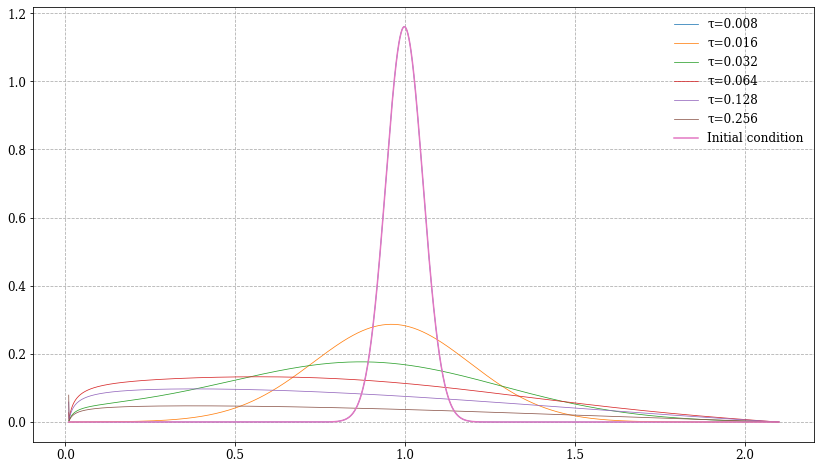

In [ ]:
fig, axs = plt.subplots(figsize=(14,8))
axs.grid(ls = '--')

for τ in times[:]:
    axs.plot(x, sol.y[:, sol.t == τ], label=f'τ={τ}', lw=0.75)
axs.plot(x, Σ_initial, label='Initial condition')
plt.legend(frameon = False)

### Trying with a ghostpoint in each end
$$\frac{\partial}{\partial r}(\Sigma r^{3/2})=0$$
"List of gridpoints"
$$f_{gh}..\,f_0..\;f_1..\;f_{n-1}..\;f_n..\;f_{gh}$$
$$0=\frac{-1/2 (r_{gh})^{3/2}f_{gh} + 1/2 (r_{1})^{3/2}f_{1}}{Δr}$$

$$\Rightarrow f_{gh}=\left(\frac{r_1}{r_{gh}}\right)^{3/2}f_1$$

In [ ]:
N = 2001
A = A_matrix_regular(N + 2, 3, 1)
A[0] = 0
A[0, 0] = 1
A[-1] = 0
A[-1, -1] = 1
A

array([[ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0.5, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  0. ,  0.5],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  1. ]])

In [ ]:
x_i = 0.01
x_f = 2.1
x = np.linspace(x_i, x_f, N)
Δx = x[1] - x[0]
Δt = 0.004


def green_bound2(t, Σ):
   
    x_ghi = np.array([x[0] - Δx])
    x_ghf = np.array([x[-1] + Δx])

    ghost_i = np.array( (x[1] / x_ghi)**(3/2) * Σ[1] )
    ghost_f = np.array( (x[-2] / x_ghf)**(3/2) * Σ[-2] )

    take_dev1 = np.concatenate((ghost_i, Σ * x**(1/2), ghost_f))
    x_new = np.concatenate((x_ghi, x, x_ghf))

    take_dev2 = x_new**(1/2) * (A @ take_dev1) / Δx

    outer = (A @ take_dev2) / Δx

    return 3/x_new[1: -1] * outer[1: -1]

In [ ]:
Σ_initial = analytic_green(x, 0.006)
times = [0.008, 0.016, 0.032, 0.064, 0.128, 0.256]


sol = solve_ivp(green_bound2, [times[0], times[-1]], y0 = Σ_initial, t_eval = times, method = 'LSODA')
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 36177
     njev: 18
      nlu: 18
      sol: None
   status: 0
  success: True
        t: array([0.008, 0.016, 0.032, 0.064, 0.128, 0.256])
 t_events: None
        y: array([[ 4.33499047e-70,  2.67704026e-03,  6.80590748e-01,
         2.45498567e+00,  3.04473436e+00,  2.92779675e+00],
       [ 5.65812857e-70, -4.86599985e-06, -5.95835135e-04,
        -1.27992220e-03, -1.01068964e-03, -4.93414551e-04],
       [ 7.43738315e-70,  2.32906137e-03,  6.05699103e-01,
         2.20405254e+00,  2.74640964e+00,  2.65166509e+00],
       ...,
       [ 0.00000000e+00,  1.07240597e-05,  1.63060648e-02,
         1.16920467e-01,  2.20549809e-01,  2.62962223e-01],
       [ 0.00000000e+00,  2.95572338e-07,  1.51440164e-04,
         4.61033068e-04,  3.97481615e-04,  1.97670521e-04],
       [ 0.00000000e+00,  1.11044698e-05,  1.65031409e-02,
         1.17493841e-01,  2.20986867e-01,  2.63103755e-01]])
 y_events: No

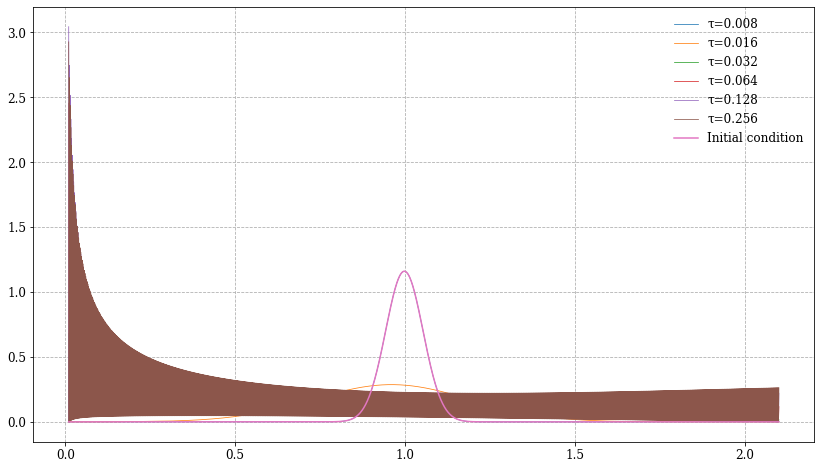

In [ ]:
fig, axs = plt.subplots(figsize=(14,8))
axs.grid(ls = '--')

for τ in times[:]:
    axs.plot(x, sol.y[:, sol.t == τ], label=f'τ={τ}', lw=0.75)
axs.plot(x, Σ_initial, label='Initial condition')
plt.legend(frameon = False)

In [ ]:
type(Σ_initial * x**(1/2))

numpy.ndarray